In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [5]:
data= pd.read_csv(r"E:\Thesis dataset\Gestational_Diabetes_Dataset.csv")
data.head(3)

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0


In [7]:
data.columns

Index(['Case Number', 'Age', 'No of Pregnancy',
       'Gestation in previous Pregnancy', 'BMI', 'HDL', 'Family History',
       'unexplained prenetal loss', 'Large Child or Birth Default', 'PCOS',
       'Sys BP', 'Dia BP', 'OGTT', 'Hemoglobin', 'Sedentary Lifestyle',
       'Prediabetes', 'Class Label(GDM /Non GDM)'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [11]:
data.isnull().sum()

Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64

In [14]:
data=data.fillna(0)

In [16]:
data.isnull().sum()

Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64

In [18]:
data.iloc[2500:2505]    


,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
2500,2501,45,3,1,27.4,0.0,0,1,0,1,142.0,92,165.0,14.6,0,0,1
2501,2502,43,2,1,27.7,0.0,0,1,0,1,165.0,104,165.0,14.3,0,0,1
2502,2503,43,2,1,27.8,0.0,0,1,0,1,147.0,94,168.0,13.1,0,0,1
2503,2504,42,2,1,26.6,0.0,0,1,0,1,169.0,91,159.0,13.5,0,0,1
2504,2505,45,3,1,27.6,0.0,0,1,0,1,150.0,94,160.0,12.8,0,0,1


In [21]:
data.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.00000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,19.312170,33.275177,0.498156,0.364823,0.35773,0.264681,70.095603,81.538156,145.864113,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,13.698542,22.864112,0.500068,0.481449,0.47940,0.441226,69.794145,11.379758,74.877084,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,74.000000,127.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,24.900000,43.000000,0.000000,0.000000,0.00000,0.000000,94.000000,81.000000,154.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,29.600000,52.000000,1.000000,1.000000,1.00000,1.000000,134.000000,86.000000,184.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [23]:
data["Class Label(GDM /Non GDM)"].value_counts()

Class Label(GDM /Non GDM)
0    2153
1    1372
Name: count, dtype: int64

In [27]:
x = data.iloc[:, 1:-1]
y = data['Class Label(GDM /Non GDM)']

In [29]:
print(data.shape)

(3525, 17)


In [31]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(3525, 15) (2820, 15) (705, 15)


# KNN Accuracy

In [37]:

x_train_scaled=pd.DataFrame(scaler.transform(x_train),columns=x.columns)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_scaled,y_train)


train_pred = knc.predict(x_train_scaled)
train_accuracy=accuracy_score(train_pred,y_train)


test_pred = knc.predict(x_test_scaled)
test_accuracy=accuracy_score(test_pred,y_test)

print("Train Accuracy=> ",train_accuracy*100)
print("Test Accuract=> ",test_accuracy*100)

Train Accuracy=>  98.47517730496453
Test Accuract=>  96.73758865248226


# SVM Accuracy

In [39]:
model_classifier=svm.SVC(kernel='linear',gamma=1e-2,C=10)
model_classifier.fit(x_train,y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [41]:
train_prediction=model_classifier.predict(x_train)
train_accuracy=accuracy_score(train_prediction,y_train)


test_prediction=model_classifier.predict(x_test)
test_accuracy=accuracy_score(test_prediction,y_test)


print("Train Accuracy=> ",train_accuracy*100)
print("Test Accuracy=> ",test_accuracy*100)

Train Accuracy=>  97.51773049645391
Test Accuracy=>  96.31205673758865


# Random Forest Accuracy

In [43]:
clf =RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
Ran_train_prediction = clf.predict(x_train)
Ran_train_accuracy = accuracy_score(Ran_train_prediction,y_train)


Ran_test_prediction = clf.predict(x_test)
Ran_test_accuracy = accuracy_score(Ran_test_prediction,y_test)

print("Train Accuracy=> ",Ran_train_accuracy*100)
print("Test Accuracy=> ",Ran_test_accuracy*100)

Train Accuracy=>  100.0
Test Accuracy=>  96.59574468085106


# Sample GDM / Non-GDM Check

In [47]:
#input_data = [26, 2, 1, 0.0, 51.0, 0, 0, 0, 0, 94.0, 68, 0.0, 15.0, 0 ,0]  
input_data = [2502, 43, 2, 1, 27.7 ,0.0 ,0, 1, 0, 1, 165.0, 104 ,165.0, 14.3, 0]  	


input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)

prediction = model_classifier.predict(std_data)
print("Prediction:", prediction)

if prediction[0] == 0:
    print("Non GDM")
else:
    print("GDM")

Prediction: [1]
GDM


C:\Users\Moynuddin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Moynuddin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Feature Importance using-Random Forest(Weighted)


Feature Importance
                           Features  Important Features
11                             OGTT            0.230147
4                               HDL            0.224447
3                               BMI            0.153803
10                           Dia BP            0.096516
14                      Prediabetes            0.094856
2   Gestation in previous Pregnancy            0.054875
9                            Sys BP            0.053698
8                              PCOS            0.044766
12                       Hemoglobin            0.015620
0                               Age            0.010213
1                   No of Pregnancy            0.006017
7      Large Child or Birth Default            0.005299
5                    Family History            0.004130
6         unexplained prenetal loss            0.002958
13              Sedentary Lifestyle            0.002657


C:\Users\Moynuddin\AppData\Local\Temp\ipykernel_17272\4176969946.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Important Features", y="Features", data=importance_df, palette='viridis')


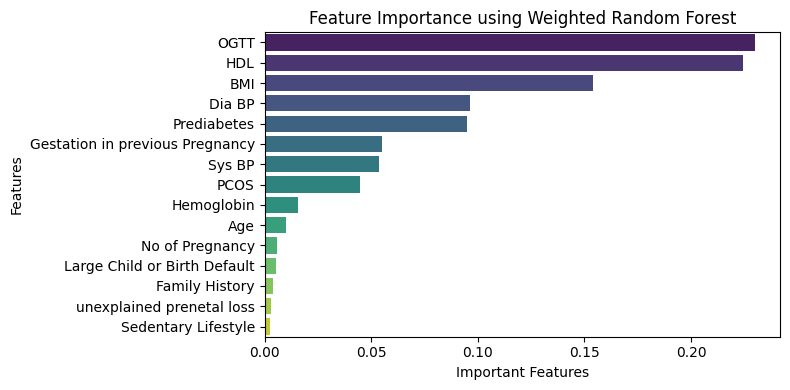

In [49]:
important_features=clf.feature_importances_
feature_names=x.columns

importance_df = pd.DataFrame({"Features": feature_names,"Important Features": important_features}).sort_values(by="Important Features", ascending=False)

print("\nFeature Importance")
print(importance_df)

plt.figure(figsize=(8,4))
sns.barplot(x="Important Features", y="Features", data=importance_df, palette='viridis')
plt.title('Feature Importance using Weighted Random Forest')
plt.tight_layout()
plt.show()

# Impacted Feature on GDM/Non-GDM using SVM

                           Features  Important Features
7      Large Child or Birth Default            0.853337
8                              PCOS            0.691472
13              Sedentary Lifestyle            0.526677
14                      Prediabetes            0.469469
2   Gestation in previous Pregnancy            0.265239
6         unexplained prenetal loss            0.233318
1                   No of Pregnancy            0.103670
12                       Hemoglobin            0.078734
4                               HDL            0.040520
3                               BMI            0.020934
11                             OGTT            0.018211
10                           Dia BP            0.016611
0                               Age            0.012499
9                            Sys BP            0.008354
5                    Family History            0.000296


C:\Users\Moynuddin\AppData\Local\Temp\ipykernel_17272\3682107400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Important Features",y="Features",data=importance_df,palette='crest')


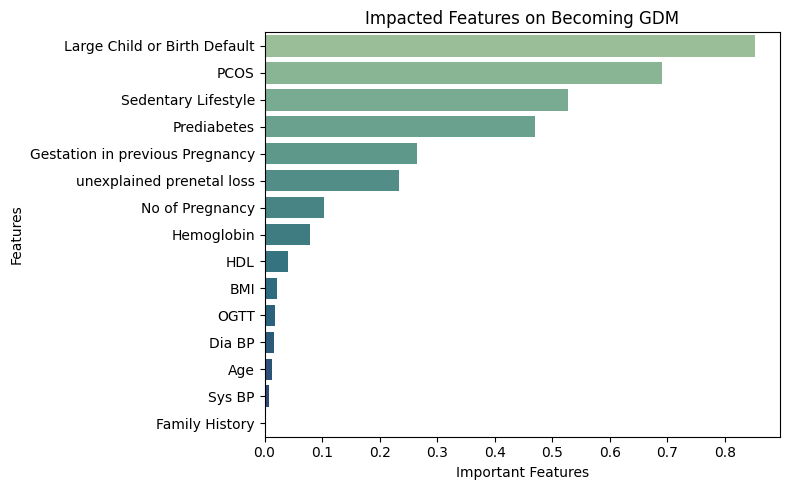

In [51]:
feature_names=data.columns[1:-1]

# Get the coefficients (weights) of the trained linear SVM model for each feature
feature_importance=model_classifier.coef_[0]

importance_df = pd.DataFrame({"Features":feature_names,"Important Features":np.abs(feature_importance)}).sort_values(by="Important Features",ascending=False)

print(importance_df)

importance_df.to_csv("feature_importance.csv",index=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Important Features",y="Features",data=importance_df,palette='crest')
plt.title("Impacted Features on Becoming GDM")
plt.tight_layout()
plt.show()

# Graph check for Each features on GDM/Non-GDM

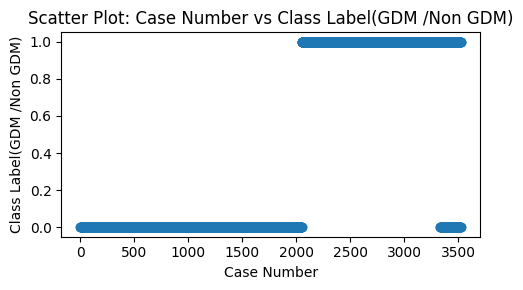

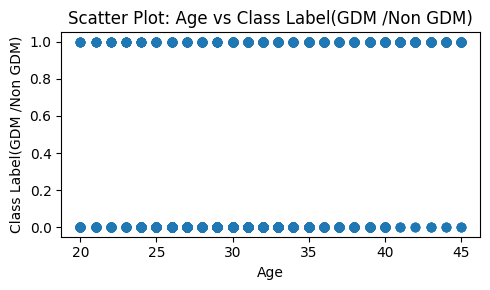

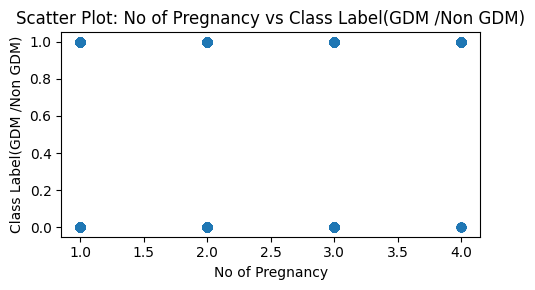

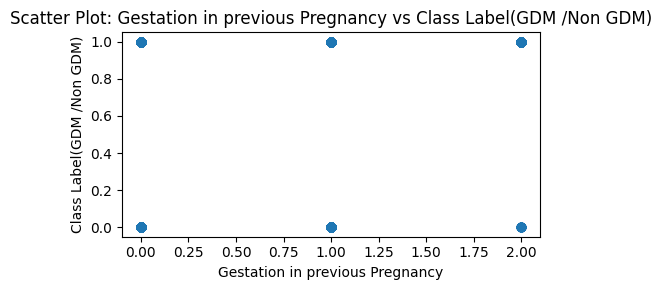

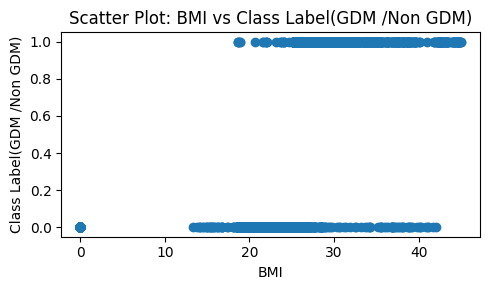

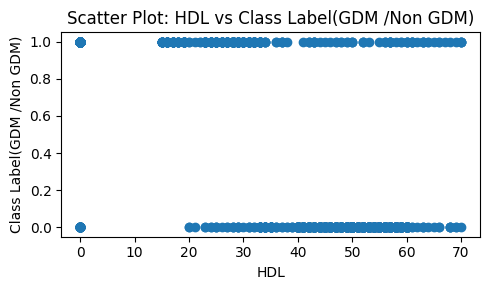

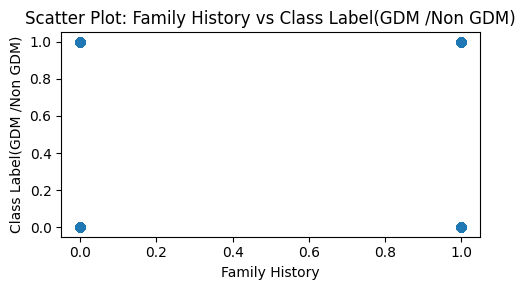

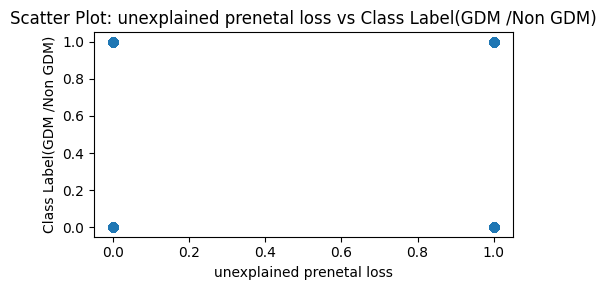

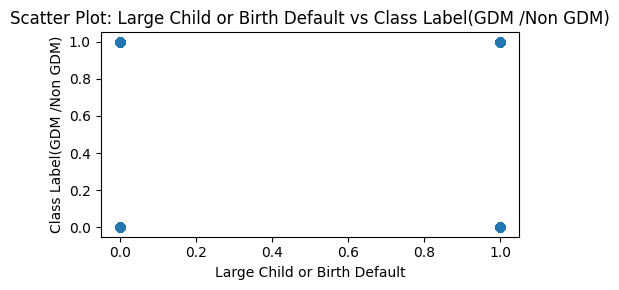

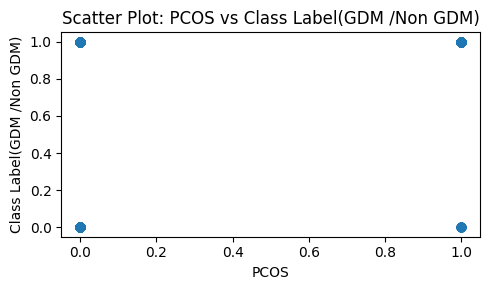

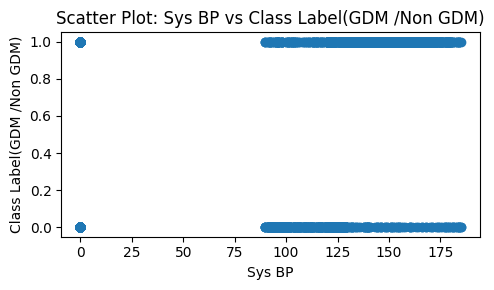

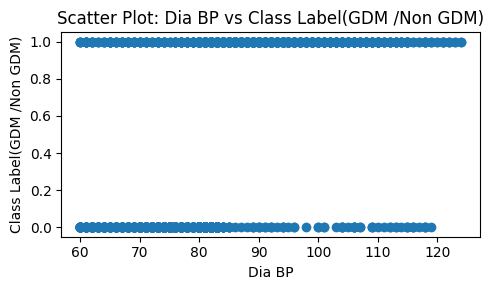

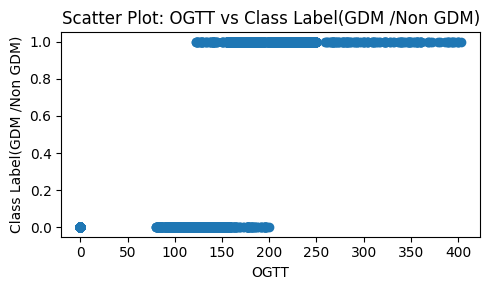

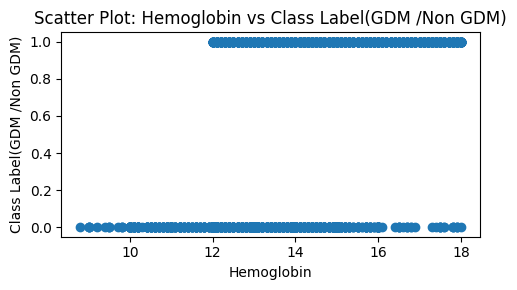

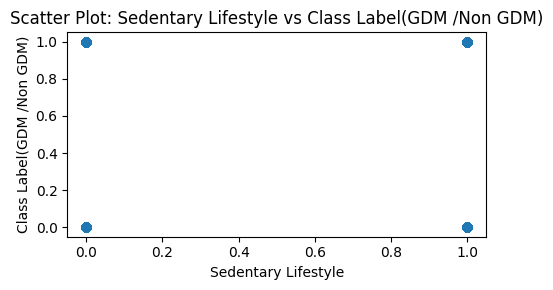

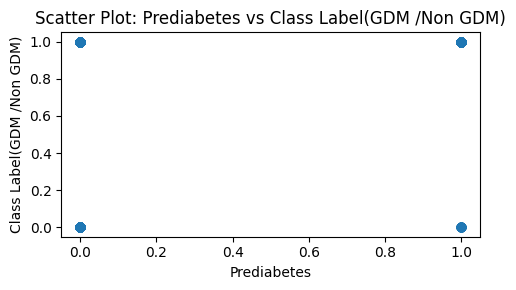

In [53]:
target_column = 'Class Label(GDM /Non GDM)'  # 🟡 Replace this with your actual target column name
                          # e.g., 'diabetes' or 'class' or whatever

# STEP 3: Loop through all features
for col in data.columns:
    if col != target_column:
        x = data[col].values
        y = data[target_column].values

        plt.figure(figsize=(5, 3))
        plt.scatter(x, y)
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.title(f'Scatter Plot: {col} vs {target_column}')
        plt.tight_layout()
        plt.show()

# Heatmap

In [ ]:
data_correlation=data.corr(numeric_only=True)

<Axes: >

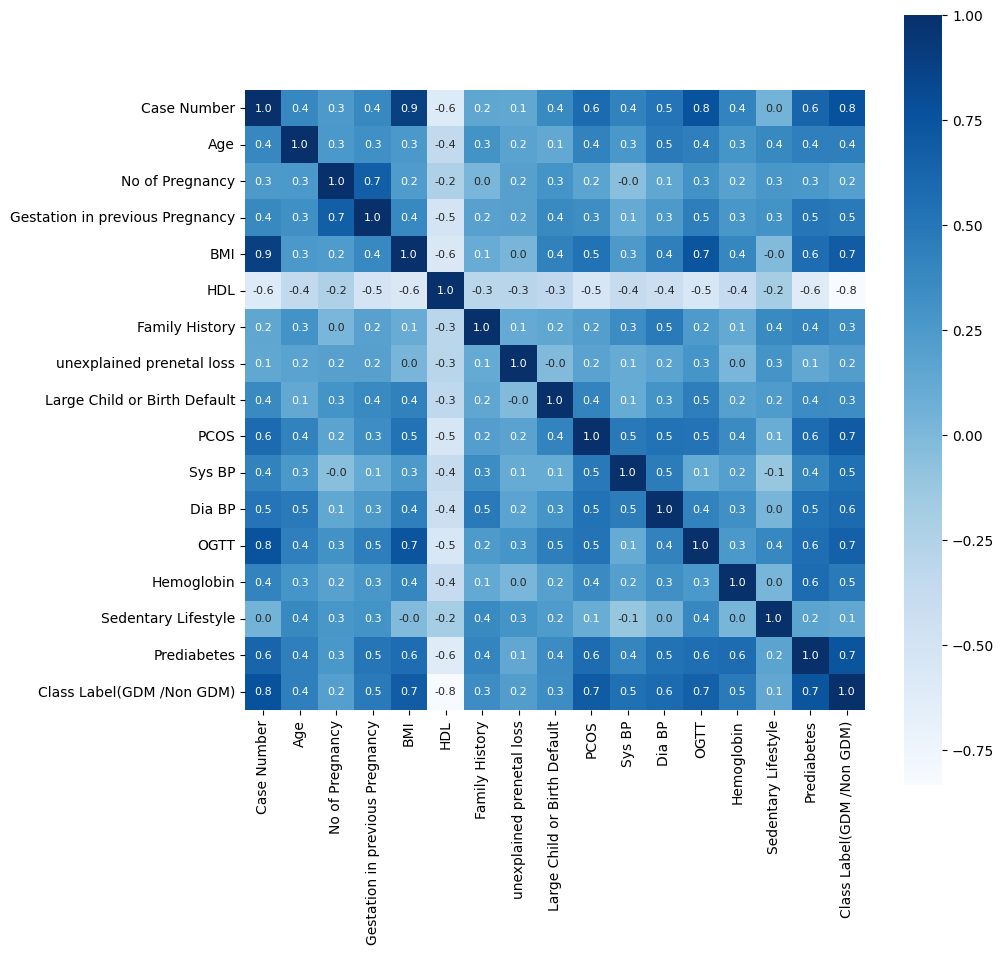

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(data_correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Histogram

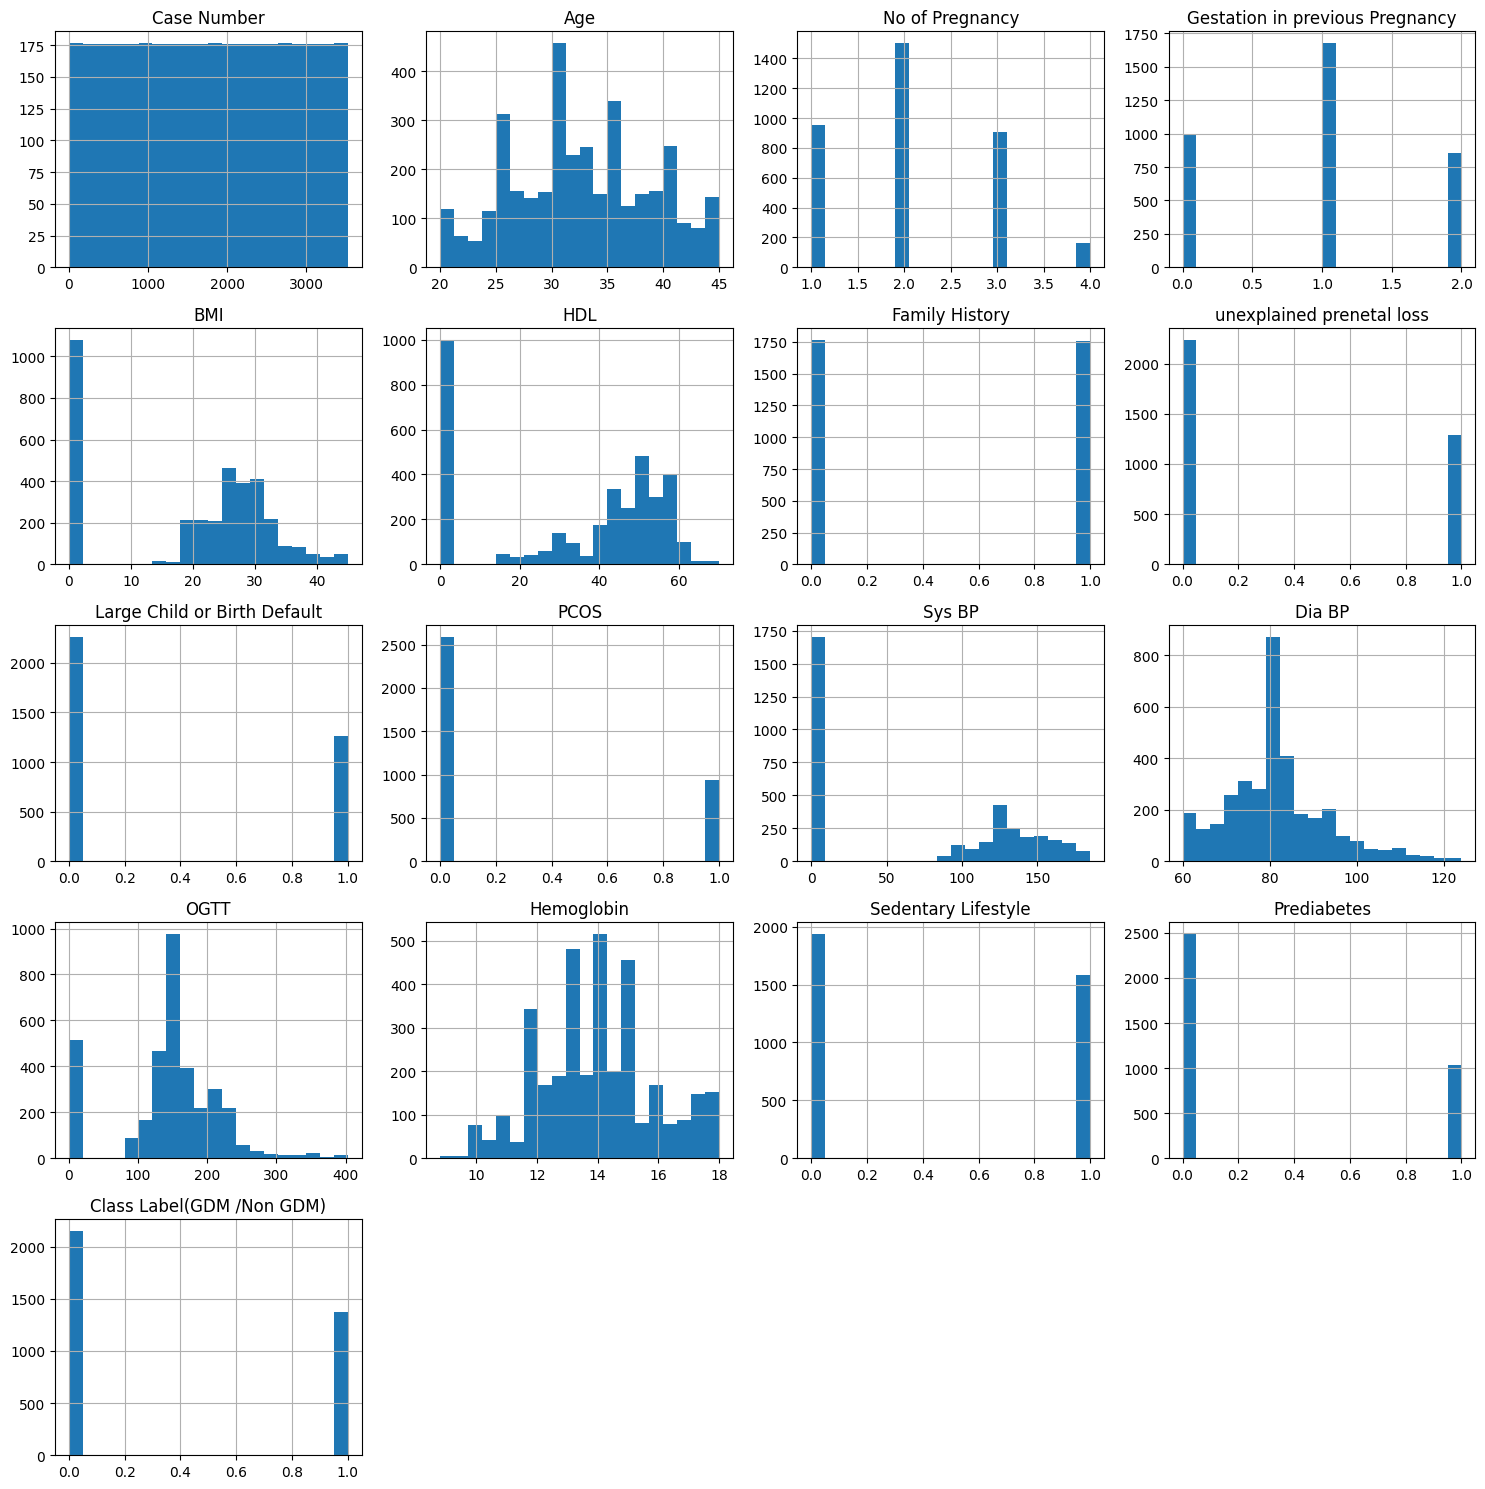

In [55]:
data.hist(figsize=(15,15),bins=20)
plt.tight_layout()
plt.show()

# Box Plot

<Axes: xlabel='OGTT'>

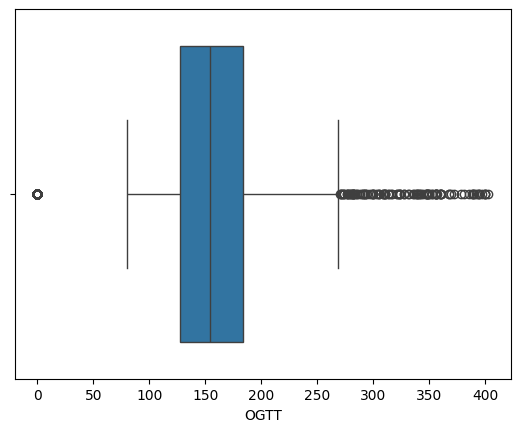

In [56]:
sns.boxplot(x=data['OGTT'])


# Pair Plot

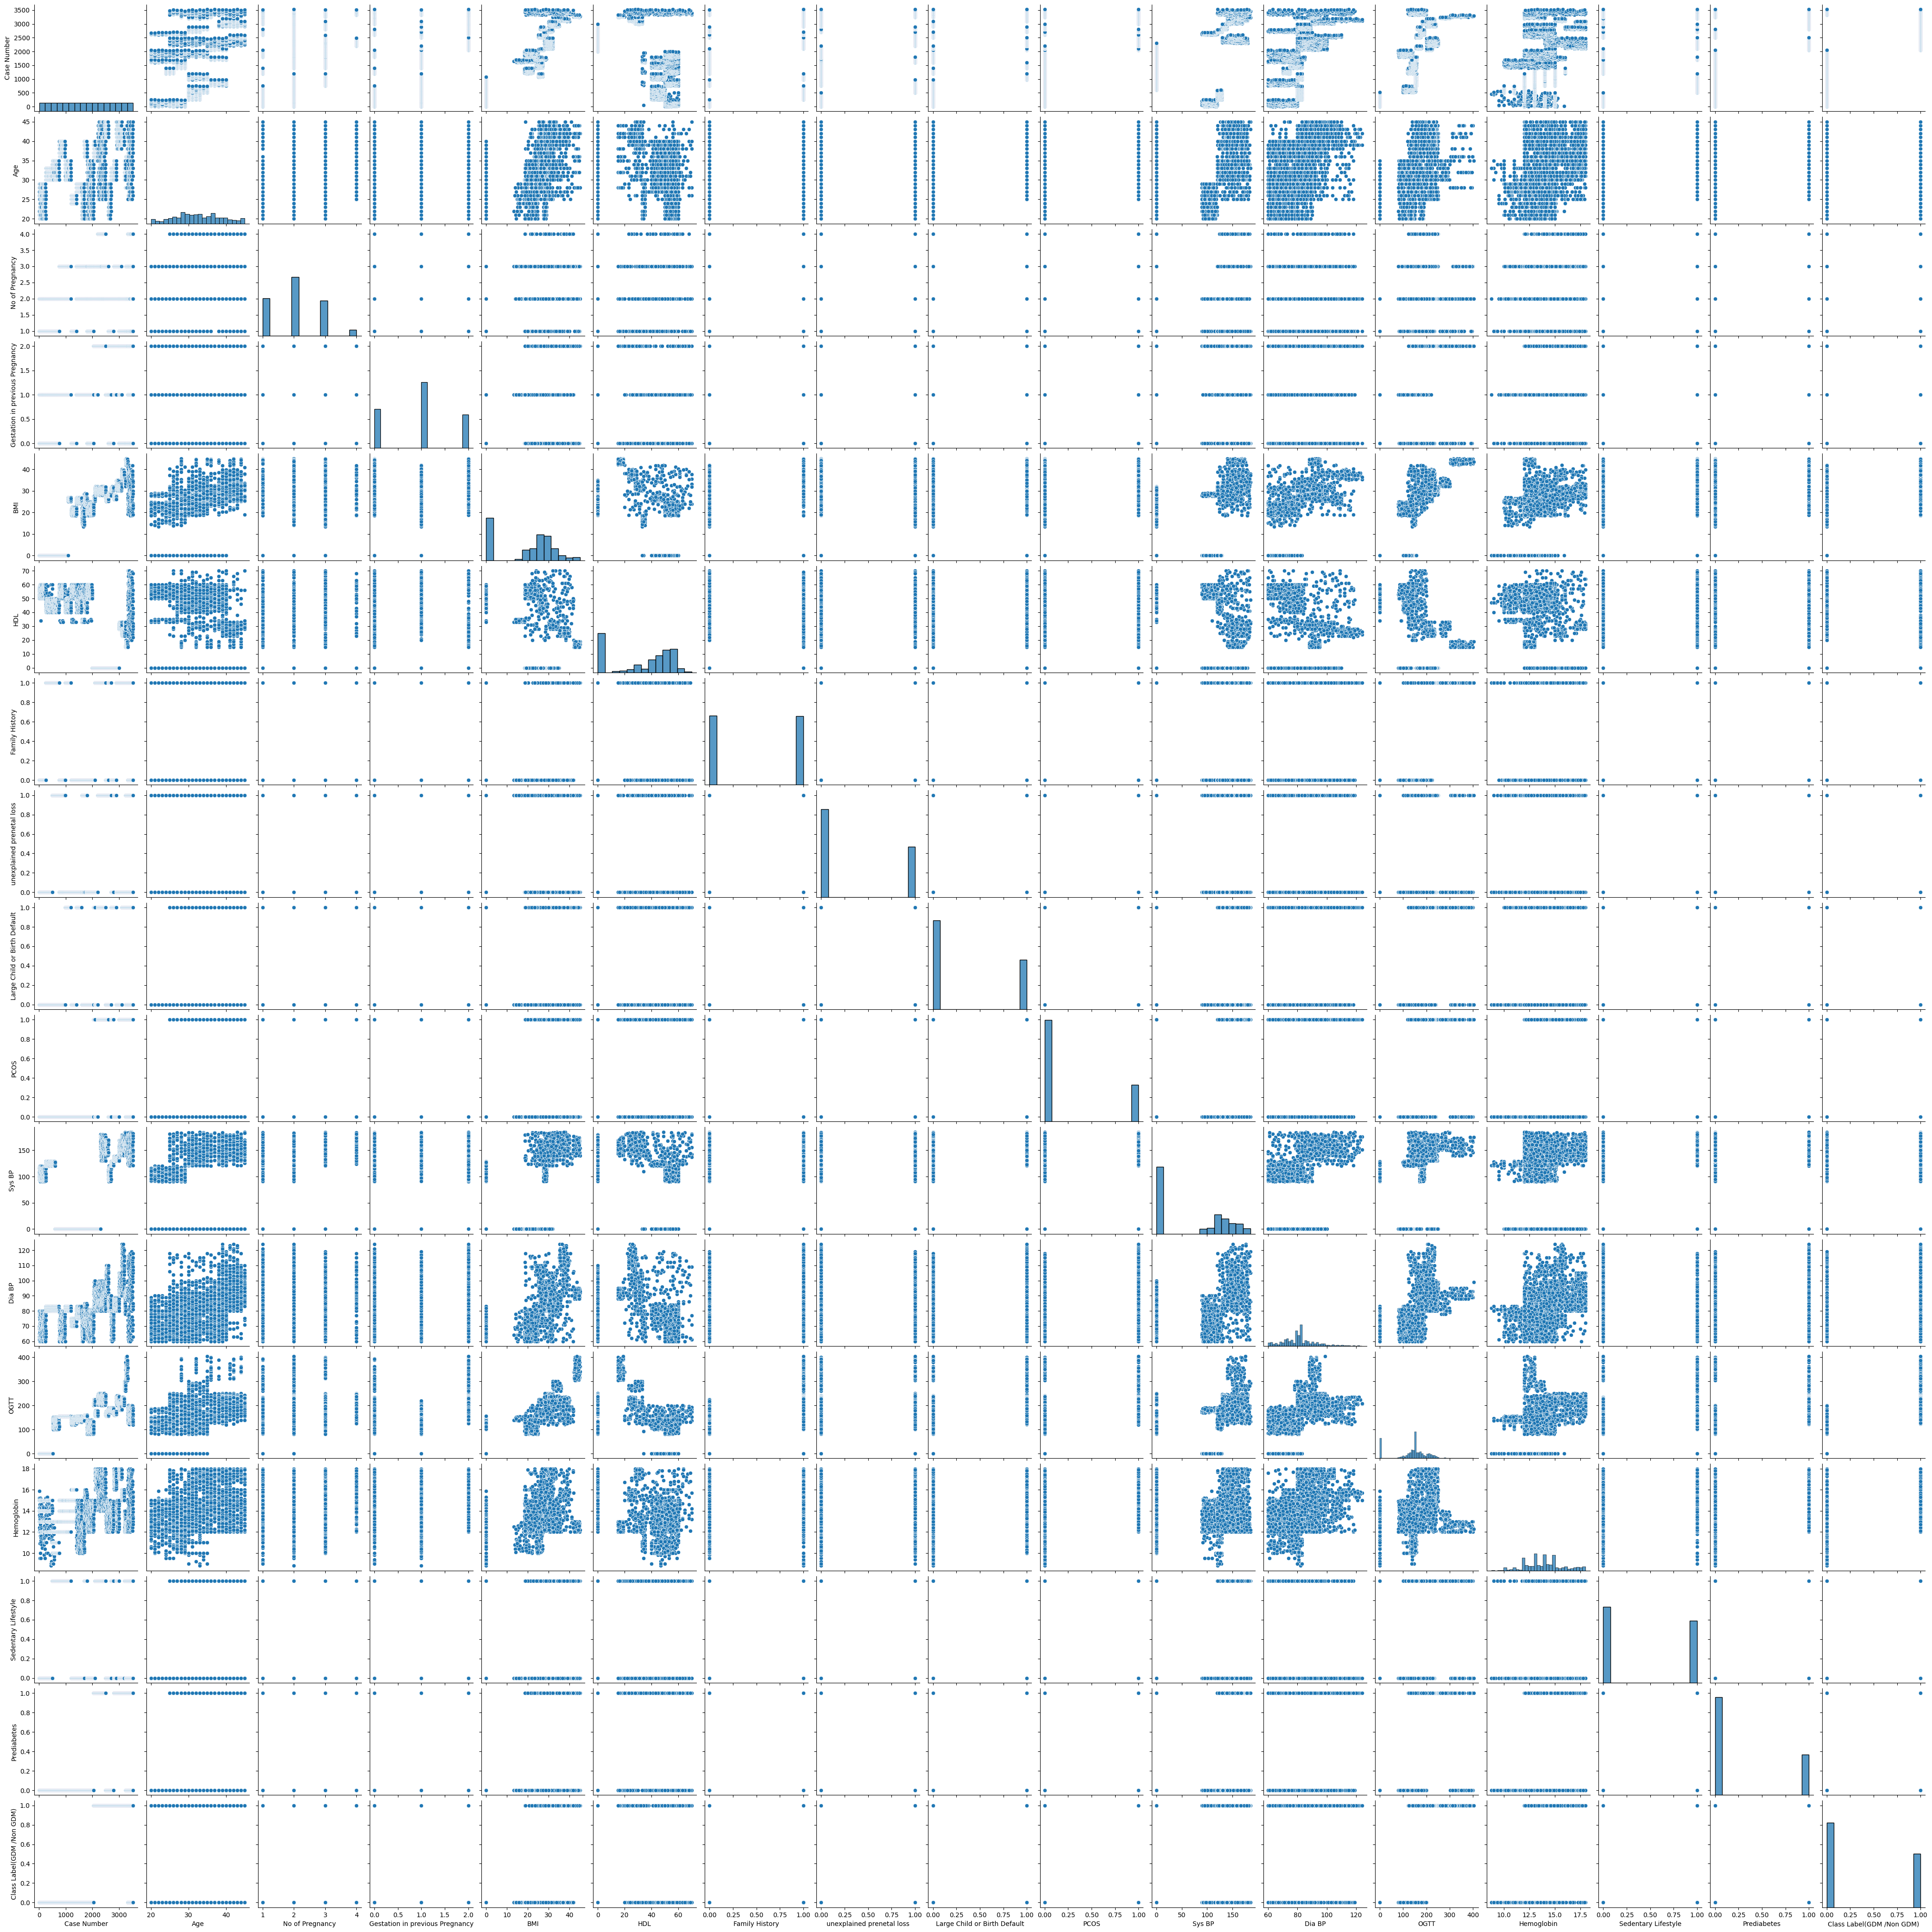

In [60]:
sns.pairplot(data)
plt.show()

# Bar Plot

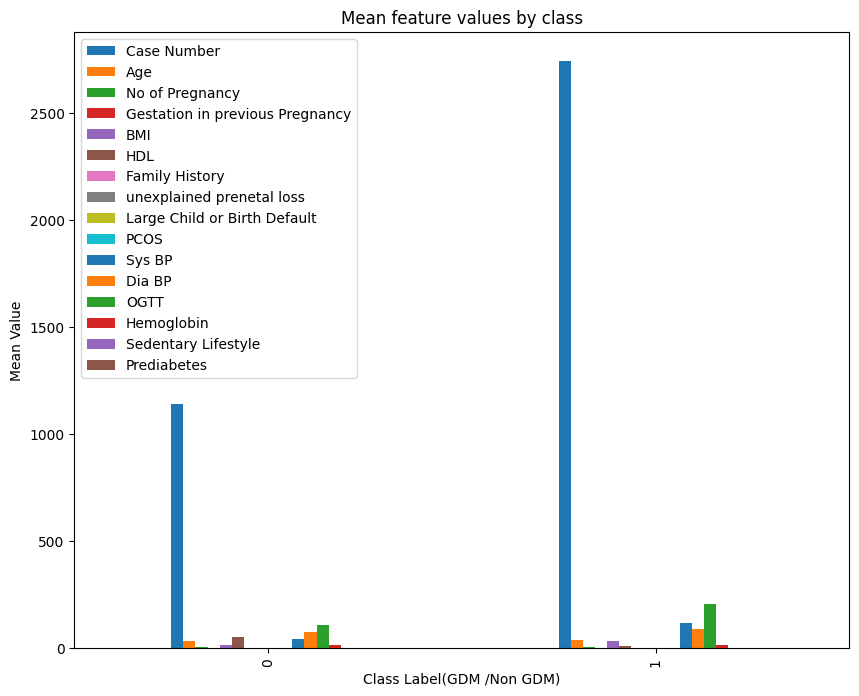

In [61]:
data.groupby('Class Label(GDM /Non GDM)').mean().plot(kind='bar',figsize=(10,8))
plt.title("Mean feature values by class")
plt.ylabel('Mean Value')
plt.show()